# OOP II: Building Classes

https://lectures.quantecon.org/py/python_oop.html

## OOP Review
### Key Concepts

In [2]:
x = [1, 5, 3]
x.sort()
print(x)

[1, 3, 5]


In [3]:
x = [1, 5, 4]
x.sort()
x.__class__

list

In [4]:
dir(x)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

## Defining Your Own Classes
### Example: A Consumer Class

In [19]:
class Consumer:
    def __init__(self, w):
        "Initialize consumer with w dollar of wealth"
        self.wealth = w
    
    
    def earn(self, y):
        "The consume earn w dollars"
        self.wealth += y
    
    
    def spend(self, x):
        "The consumers spend x dollars if feasible"
        new_wealth = self.wealth - x
        if new_wealth < 0:
            print("Insuffitient funds")
        else:
            self.wealth = new_wealth

#### Usage

In [20]:
c1  = Consumer(10)
c1.spend(5)
c1.wealth

5

In [21]:
c1.earn(15)
c1.spend(100)

Insuffitient funds


In [22]:
c1 = Consumer(15)
c2 = Consumer(10)
c2.spend(5)
c2.wealth

5

In [23]:
c1.wealth

15

In [24]:
c1.__dict__

{'wealth': 15}

In [25]:
c2.__dict__

{'wealth': 5}

#### Self

If you look at the Consumer class definition again you’ll see the word self throughout the code.

The rules with self are that

* Any instance data should be prepended with self

    * e.g., the earn method references self.wealth rather than just wealth
* Any method defined within the class should have self as its first argument

    * e.g., def earn(self, y) rather than just def earn(y)
Any method referenced within the class should be called as self.method_name

There are no examples of the last rule in the preceding code but we will see some shortly.

#### Details

In [26]:
print(Consumer.__dict__)

{'__module__': '__main__', '__init__': <function Consumer.__init__ at 0x7fba7d32bea0>, 'earn': <function Consumer.earn at 0x7fba8c16b488>, 'spend': <function Consumer.spend at 0x7fba8c16b598>, '__dict__': <attribute '__dict__' of 'Consumer' objects>, '__weakref__': <attribute '__weakref__' of 'Consumer' objects>, '__doc__': None}


In [30]:
c1 = Consumer(10)
c1.earn(10)
c1.wealth

20

In [31]:
Consumer.earn(c1, 10)
c1.wealth

30

#### Example: The Solow Growth Model

In [51]:
class Sollow:
    """
    Implements the Solow growth model with the update rule

        k_{t+1} = [(s z k^α_t) + (1 - δ)k_t] /(1 + n)
    """
    def __init__(self, n = 0.05, # population growth rate
                s = 0.25, # savings rate
                δ = 0.1, # depreciation rate
                α = 0.3, # share of labor
                z = 2.0, # productivity
                k = 1.0): # current capital stock
        self.n, self.s, self.δ, self.α, self.z = n, s, δ, α, z
        self.k = k
        
        
    def h(self):
        "Evaulate the h function"
        # Unpack parameter (get rid of self to simplfy notation)
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z
        # Apply the update rule
        return (s * z * self.k**a + (1- δ) * self.k) / (1 +n)
    
    
    def update(self):
        "Update the current state (i.e. the capital stock)."
        self.k = self.h
    
    
    def steady_state(self):
        "Compute the steady state value of capital."
        # Unpack parameters(get rid of self to simplify notation)
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z
        # Compute and return steady state
        return ((s * z) / (n + δ)**(1 / (1 - α)))
    
    
    def generate_sequence(self, t):
        "Generate and return a time series of length t"
        path = []
        for i in range(t):
            path.append(self.k)
            self.update()
        return path

In [63]:
s1.generate_sequence(3).__contains__

<method-wrapper '__contains__' of list object at 0x7fba61b37e08>

In [61]:
dir(s1.generate_sequence(3))

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

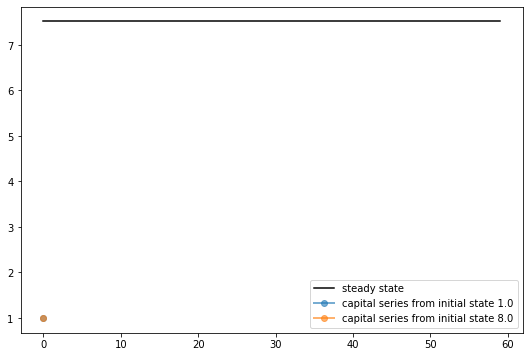

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

s1 = Sollow()
s2 = Sollow(k=8.0)

T = 60
fig, ax = plt.subplots(figsize = (9, 6))

# Plot the common steady state value of capital
ax.plot([s1.steady_state()]*T, 'k-', label='steady state')

# Plot time series for each economy
for s in s1, s2:
    lb = f'capital series from initial state {s.k}'
    ax.plot(s.generate_sequence(T), 'o-', lw=2, alpha=0.6, label=lb)

ax.legend()
plt.show()